# Importing Essential libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
from math import ceil
import os
import tensorflow as tf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Reading the dataset

In [0]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


# Analysing the dataset

In [4]:
df.info()
print()
print(df.shape)
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82657 entries, 0 to 82656
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_name           63264 non-null  object 
 1   country             82622 non-null  object 
 2   review_title        82657 non-null  object 
 3   review_description  82657 non-null  object 
 4   designation         59010 non-null  object 
 5   points              82657 non-null  int64  
 6   price               77088 non-null  float64
 7   province            82622 non-null  object 
 8   region_1            69903 non-null  object 
 9   region_2            35949 non-null  object 
 10  winery              82657 non-null  object 
 11  variety             82657 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 7.6+ MB

(82657, 12)
Index(['user_name', 'country', 'review_title', 'review_description',
       'designation', 'points', 'price', 'province', 'region

In [5]:
df.describe()

,points,price
count,82657.000000,77088.000000
mean,88.544564,36.922232
std,3.099649,43.698346
min,80.000000,4.000000
25%,86.000000,18.000000
50%,88.000000,27.000000
75%,91.000000,45.000000
max,100.000000,3300.000000


# Feature Extraction and Feature Engineering

In [6]:
import re
yearSearch = []

for value in df["review_title"]:
  regexresult = re.search(r'19\d{2}|20\d{2}', value)
  if regexresult:
    yearSearch.append(regexresult.group())
  else:
    yearSearch.append(None)

df['year'] = yearSearch

print("We extracted %d years from the wine titles and %d did not have a year." %(len(df[df['year'].notna()]), len(df[df['year'].isna()].index)))
df['year'].describe()


We extracted 80129 years from the wine titles and 2528 did not have a year.


count     80129
unique       38
top        2012
freq      10379
Name: year, dtype: object

In [7]:
df_years = df
df_years = df_years.dropna(subset = ['year'])
print("Removed " + str((df.shape[0] - df_years.shape[0])) + " rows with empty year values." + "\n")
df_years = df_years['year'].astype(int)
print(df_years.describe())



Removed 2528 rows with empty year values.

count    80129.000000
mean      2010.699410
std          3.731868
min       1904.000000
25%       2009.000000
50%       2011.000000
75%       2013.000000
max       2017.000000
Name: year, dtype: float64


# Data Visualization

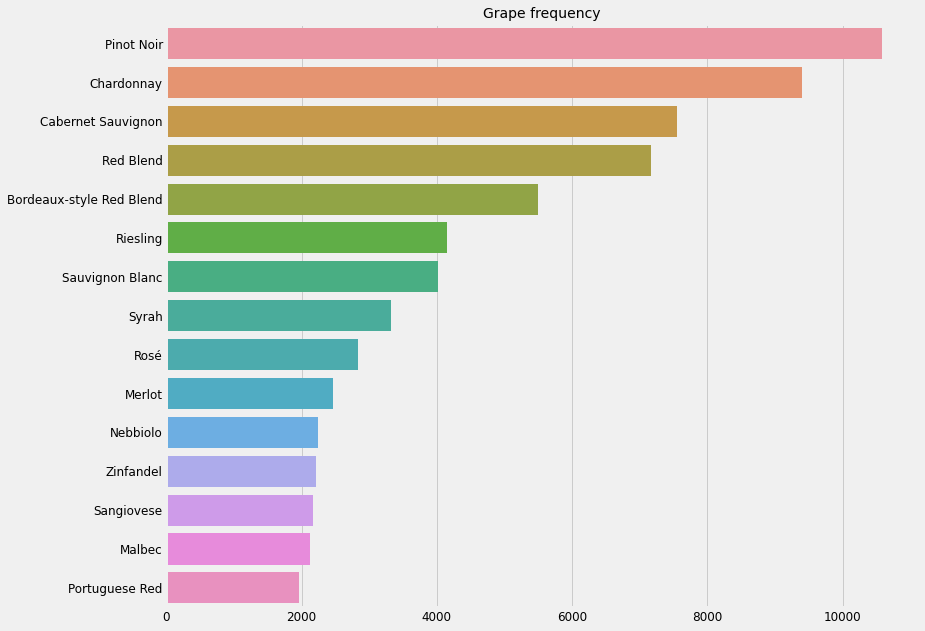

In [8]:
# Get label frequencies in descending order
label_freq = df['variety'].apply(lambda s: str(s)).explode().value_counts().sort_values(ascending=False)

# Bar plot
style.use("fivethirtyeight")
plt.figure(figsize=(12,10))
sns.barplot(y=label_freq.index.values, x=label_freq, order=label_freq.iloc[:15].index)
plt.title("Grape frequency", fontsize=14)
plt.xlabel("")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [9]:
df_wine_classifier = df[["review_description", 'year', 'variety', 'country', 'province']]

# Finding the missing values in the data 
print(df_wine_classifier.isnull().sum())
print()




#If we're missing important values, remove the row
dfWineClassifier=df_wine_classifier.dropna(subset=['review_description', 'variety'])
print('Removed ' + str(df.shape[0]-df_wine_classifier.shape[0]) + ' rows with empty values.' + "\n")


review_description       0
year                  2528
variety                  0
country                 35
province                35
dtype: int64

Removed 0 rows with empty values.



Text(0, 0.5, 'Prices')

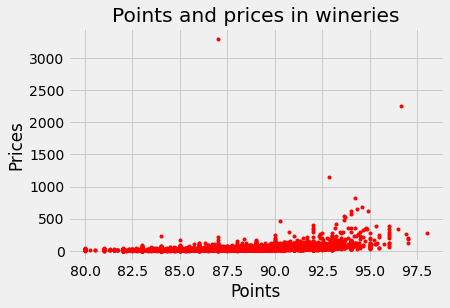

In [43]:
wineries = df[["winery", "points", "price"]].groupby(by="winery").mean()
points = wineries["points"]
prices = wineries["price"]
style.use("fivethirtyeight")
plt.plot(points, prices, "r.")
plt.title("Points and prices in wineries")
plt.xlabel("Points")
plt.ylabel("Prices")

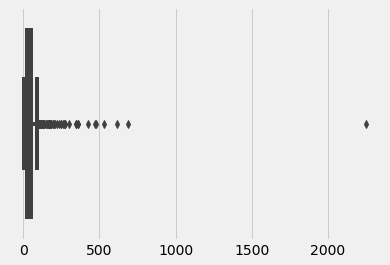

In [44]:
priceForPoint = wineries.groupby(by="points").mean()
sns.boxplot(priceForPoint)

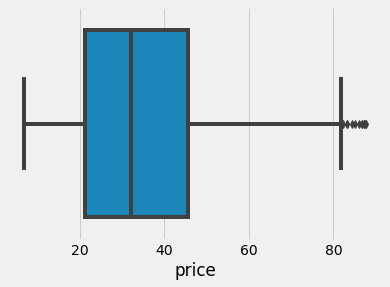

In [45]:
priceForPoint = priceForPoint["price"]
qR = priceForPoint.quantile(0.75)-priceForPoint.quantile(0.25)
delValues = []
for i in priceForPoint.index:
    if( priceForPoint[i]<priceForPoint.quantile(0.25)-1.5*qR or priceForPoint[i]>priceForPoint.quantile(0.75)+1.5*qR ):
        delValues.append(i)
priceForPoint = priceForPoint.drop( labels=delValues )
delValues = []
for i in priceForPoint.index:
    if( priceForPoint[i]<priceForPoint.quantile(0.25)-1.5*qR or priceForPoint[i]>priceForPoint.quantile(0.75)+1.5*qR ):
        delValues.append(i)
priceForPoint = priceForPoint.drop( labels=delValues )
delValues = []
for i in priceForPoint.index:
    if( priceForPoint[i]<priceForPoint.quantile(0.25)-1.5*qR or priceForPoint[i]>priceForPoint.quantile(0.75)+1.5*qR ):
        delValues.append(i)
priceForPoint = priceForPoint.drop( labels=delValues )

sns.boxplot(priceForPoint)

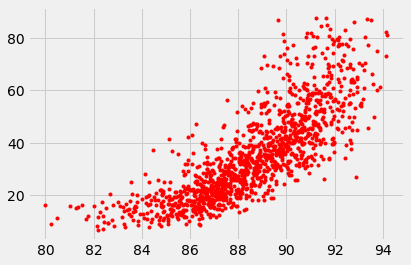

In [46]:
plt.plot( priceForPoint.index, priceForPoint, '.r' )

In [48]:
countries = df[ ["country", "winery"] ].groupby(by="country").count().sort_values(by="winery")[::-1]
print(countries)

                winery
country               
US               38573
France           15948
Italy             9112
Portugal          3197
Chile             2891
Spain             2755
Argentina         2570
Austria           1892
Germany           1573
New Zealand       1121
Australia         1028
South Africa       727
Israel             320
Canada             176
Greece             139
Bulgaria            93
Romania             80
England             62
Slovenia            42
Mexico              38
Hungary             35
Moldova             35
Uruguay             33
Turkey              33
Lebanon             28
Brazil              28
Morocco             21
Georgia             12
Croatia             12
Ukraine             11
Peru                 8
Cyprus               6
Macedonia            5
Luxembourg           5
Switzerland          5
Serbia               4
Czech Republic       3
India                1


In [49]:
print( "Number of countries: "+str(len(countries)) )

Number of countries: 38


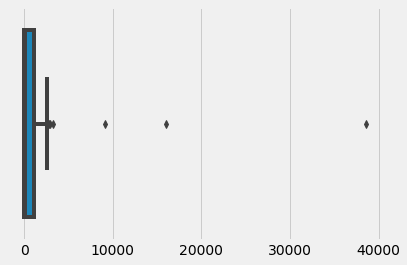

In [50]:
sns.boxplot(countries)

In [10]:
RARE_CUTOFF = 700 # It must have this many examples of the grape variety, otherwise it's "other."

# Create a list of rare labels
rare = list(label_freq[label_freq<RARE_CUTOFF].index)
# print("We will be ignoring these rare labels: \n", rare)


# Transform the rare ones to just "Other"
df_wine_classifier['variety'] = df_wine_classifier['variety'].apply(lambda s: str(s) if s not in rare else 'Other')

label_words = list(label_freq[label_freq>=RARE_CUTOFF].index)
label_words.append('Other')
print(label_words)

num_labels = len(label_words)
print("\n"  + str(num_labels) + " different categories.")


['Pinot Noir', 'Chardonnay', 'Cabernet Sauvignon', 'Red Blend', 'Bordeaux-style Red Blend', 'Riesling', 'Sauvignon Blanc', 'Syrah', 'Rosé', 'Merlot', 'Nebbiolo', 'Zinfandel', 'Sangiovese', 'Malbec', 'Portuguese Red', 'White Blend', 'Sparkling Blend', 'Tempranillo', 'Rhône-style Red Blend', 'Pinot Gris', 'Champagne Blend', 'Cabernet Franc', 'Grüner Veltliner', 'Portuguese White', 'Pinot Grigio', 'Bordeaux-style White Blend', 'Gewürztraminer', 'Gamay', 'Other']

29 different categories.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [11]:
for i in range(1,5):
    print(df_wine_classifier['variety'].iloc[i])
    print(df_wine_classifier['review_description'].iloc[i])
    print()

Red Blend
This wine is near equal parts Syrah and Merlot with the balance Cabernet Sauvignon. Aromas of blue fruit, vanilla, cherry and herb lead to full-bodied pit-fruit flavors that bring a sense of deliciousness that is hard to resist.

Nebbiolo
Barolo Conca opens with inky dark concentration and soothing aromas of black fruit, spice, cola, plum, prune and dried lavender buds. The nose presents those ethereal and delicate aromas, but in the mouth, it delivers thicker flavors of chocolate and mocha. Drink after 2018.

Bordeaux-style White Blend
It's impressive what a small addition of Sauvignon Gris and Muscadelle can do to a Sauvignon-Sémillon blend—it turns this into an exotic wine, with spice and lychee flavors.

Malbec
This ripe, sweet wine is rich and full of dried and fresh fruit flavors. It is spicy, with a touch of spirit on the palate as well as bold black-plum fruit, dense tannins and a sweet aftertaste. Drink from 2017.



# Data Preprocessing

In [12]:
# length of dictionary
NUM_WORDS = 4000

# Length of each review
SEQ_LEN = 256

#create tokenizer for our data
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=NUM_WORDS, oov_token='<UNK>')
tokenizer.fit_on_texts(df_wine_classifier['review_description'])

#convert text data to numerical indexes
wine_seqs=tokenizer.texts_to_sequences(df_wine_classifier['review_description'])

#pad data up to SEQ_LEN (note that we truncate if there are more than SEQ_LEN tokens)
wine_seqs=tf.keras.preprocessing.sequence.pad_sequences(wine_seqs, maxlen=SEQ_LEN, padding="post")

print(wine_seqs)

[[ 395  132   18 ...    0    0    0]
 [   7    9    8 ...    0    0    0]
 [1005    1  161 ...    0    0    0]
 ...
 [   7    8    4 ...    0    0    0]
 [  41  389    9 ...    0    0    0]
 [   4  179   40 ...    0    0    0]]


In [13]:

wine_labels=pd.DataFrame({'variety': df_wine_classifier['variety']})
# wine_labels=wine_labels.replace({'variety' : char2idx})
wine_labels=wine_labels.replace(' ', '_', regex=True)

wine_labels_list = []
for item in wine_labels['variety']:
    wine_labels_list.append(str(item))

label_tokenizer = tf.keras.preprocessing.text.Tokenizer(split=' ', filters='!"#$%&()*+,./:;<=>?@[\\]^`{|}~\t\n')
label_tokenizer.fit_on_texts(wine_labels_list)

print(len(label_words))
print(label_tokenizer.word_index)

wine_label_seq = np.array(label_tokenizer.texts_to_sequences(wine_labels_list))
wine_label_seq.shape

29
{'pinot_noir': 1, 'chardonnay': 2, 'cabernet_sauvignon': 3, 'red_blend': 4, 'bordeaux-style_red_blend': 5, 'riesling': 6, 'sauvignon_blanc': 7, 'syrah': 8, 'rosé': 9, 'merlot': 10, 'nebbiolo': 11, 'zinfandel': 12, 'sangiovese': 13, 'malbec': 14, 'portuguese_red': 15, 'white_blend': 16, 'sparkling_blend': 17, 'tempranillo': 18, 'rhône-style_red_blend': 19, 'pinot_gris': 20, 'champagne_blend': 21, 'cabernet_franc': 22, 'grüner_veltliner': 23, 'portuguese_white': 24, 'pinot_grigio': 25, 'bordeaux-style_white_blend': 26, 'gewürztraminer': 27, 'gamay': 28}


(82657, 1)

In [0]:
reverse_word_index = dict([(value, key) for (key, value) in tokenizer.word_index.items()])

def decode_article(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])


reverse_label_index = dict([(value, key) for (key, value) in label_tokenizer.word_index.items()])

def decode_label(text):
    return ' '.join([reverse_label_index.get(i, '?') for i in text])



In [15]:
# Demonstrate what the input looks like, how it gets encoded.

test_entry=3

print(decode_article(wine_seqs[test_entry]))
print('---')
print(wine_seqs[test_entry])

print(decode_label(wine_label_seq[test_entry]))
print('---')
print(wine_label_seq[test_entry])


it's impressive what a small addition of sauvignon gris and <UNK> can do to a sauvignon sémillon <UNK> turns this into an exotic wine with spice and lychee flavors ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
---
[  24  389  451    4  509 1343    5   84  811    2    1  361  832   13
    4   84 1230    1  852    7  114   41  376    9    6   34    2  960
   11    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0   

# Splitting the data

In [20]:
import sklearn.model_selection as sk
# Divide into two
X_train, X_test, y_train, y_test = sk.train_test_split(wine_seqs,
                                                    wine_label_seq,
                                                    test_size=0.10,
                                                    random_state=42)

print('Test: ' + str(len(X_test)) + ' Train: ' + str(len(X_train)))

X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

print(type(X_train), X_train.shape)


print(X_train.shape)
print(y_train.shape)

Test: 8266 Train: 74391
<class 'numpy.ndarray'> (74391, 256)
(74391, 256)
(74391, 1)


# Model Building

In [21]:
EMBEDDING_SIZE = 256
EMBEDDING_SIZE_2 = 64
EMBEDDING_SIZE_3 = (num_labels+1)
LR = 1e-5 

model = tf.keras.Sequential([
    # Add an Embedding layer expecting input vocab of a given size, and output embedding dimension of fized size we set at the top
    tf.keras.layers.Embedding(NUM_WORDS, EMBEDDING_SIZE),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv1D(128, 5, activation='relu'), 
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.GlobalMaxPooling1D(), 
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(EMBEDDING_SIZE_2, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    # Add a Dense layer with additional units and softmax activation.
    # When we have multiple outputs, softmax convert outputs layers into a probability distribution.
    tf.keras.layers.Dense(EMBEDDING_SIZE_3, activation='softmax')
])

model.summary()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 256)         1024000   
_________________________________________________________________
dropout_4 (Dropout)          (None, None, 256)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 128)         163968    
_________________________________________________________________
dropout_5 (Dropout)          (None, None, 128)         0         
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

# Training the model

In [22]:
# Directory where the checkpoints will be saved
checkpoint_dir = '/content/checkpoints/classifer_training_checkpoints.h5'
# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    monitor='accuracy',
    save_best_only=True,
    mode='auto',
    save_weights_only=True)

history = model.fit(X_train, y_train,
                    batch_size = 30,
                    epochs=10,
                    validation_data=(X_test, y_test),
                    validation_steps = 30,
                   callbacks=[checkpoint_callback])

loss, accuracy = model.evaluate(X_test, y_test)

print("Loss: ", loss)
print("Accuracy: ", accuracy)


Epoch 1/10
2480/2480 [==============================] - 66s 26ms/step - loss: 2.2274 - accuracy: 0.3512 - val_loss: 1.5940 - val_accuracy: 0.5800
Epoch 2/10
2480/2480 [==============================] - 65s 26ms/step - loss: 1.6422 - accuracy: 0.4991 - val_loss: 1.4084 - val_accuracy: 0.6222
Epoch 3/10
2480/2480 [==============================] - 65s 26ms/step - loss: 1.5316 - accuracy: 0.5318 - val_loss: 1.3255 - val_accuracy: 0.6289
Epoch 4/10
2480/2480 [==============================] - 66s 27ms/step - loss: 1.4734 - accuracy: 0.5496 - val_loss: 1.2879 - val_accuracy: 0.6489
Epoch 5/10
2480/2480 [==============================] - 66s 26ms/step - loss: 1.4387 - accuracy: 0.5610 - val_loss: 1.2432 - val_accuracy: 0.6389
Epoch 6/10
2480/2480 [==============================] - 65s 26ms/step - loss: 1.4115 - accuracy: 0.5697 - val_loss: 1.2049 - val_accuracy: 0.6389
Epoch 7/10
2480/2480 [==============================] - 66s 26ms/step - loss: 1.3959 - accuracy: 0.5728 - val_loss: 1.2060 -

# Model Summary

In [23]:
tf.train.latest_checkpoint(checkpoint_dir)

model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))

model.build(tf.TensorShape([1, None]))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 256)         1024000   
_________________________________________________________________
dropout_4 (Dropout)          (None, None, 256)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 128)         163968    
_________________________________________________________________
dropout_5 (Dropout)          (None, None, 128)         0         
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

# Performance Plots

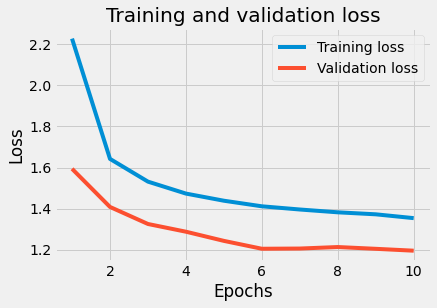

In [24]:
history_dict = history.history
history_dict.keys()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)


plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()



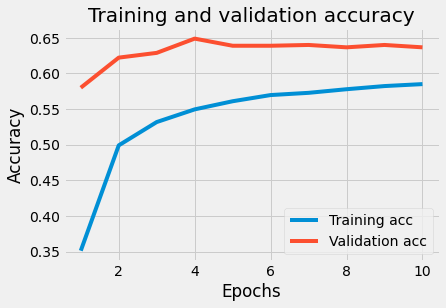

In [25]:
plt.clf()   # clear figure

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

# Prediction on unseen data

In [0]:
def sample_predict(sample_pred_text, pad):
  encoded_sample_pred_text = tokenizer.texts_to_sequences(sample_pred_text)
  print(encoded_sample_pred_text)
  print(type(encoded_sample_pred_text))

  if pad:
    encoded_sample_pred_text = pad_to_size(encoded_sample_pred_text, SEQ_LEN)
    
  encoded_sample_pred_text = np.array(encoded_sample_pred_text)
  encoded_sample_pred_text = encoded_sample_pred_text.astype("float32")
  predictions = model.predict(encoded_sample_pred_text)


In [27]:
new_review = ['Crisp grapefruit and grassy lemon.']
encoded_sample_pred_text = tokenizer.texts_to_sequences(new_review)
# Some models need padding, some don't - depends on the embedding layer.
encoded_sample_pred_text = tf.keras.preprocessing.sequence.pad_sequences(encoded_sample_pred_text, maxlen=SEQ_LEN, padding="post")
predictions = model.predict(encoded_sample_pred_text)

for n in reversed((np.argsort(predictions))[0]):
    predicted_id = [n]
    print("Guess: %s \n Probability: %f" %(decode_label(predicted_id).replace('_', ' '), 100*predictions[0][predicted_id][0]) + '%')

Guess: sauvignon blanc 
 Probability: 50.738043%
Guess: chardonnay 
 Probability: 16.888437%
Guess: bordeaux-style white blend 
 Probability: 6.524388%
Guess: white blend 
 Probability: 5.669224%
Guess: riesling 
 Probability: 4.555720%
Guess: pinot gris 
 Probability: 3.966882%
Guess: grüner veltliner 
 Probability: 3.228327%
Guess: pinot grigio 
 Probability: 2.885943%
Guess: portuguese white 
 Probability: 2.264085%
Guess: sparkling blend 
 Probability: 1.358954%
Guess: gewürztraminer 
 Probability: 0.934037%
Guess: rosé 
 Probability: 0.627023%
Guess: champagne blend 
 Probability: 0.227396%
Guess: pinot noir 
 Probability: 0.073171%
Guess: bordeaux-style red blend 
 Probability: 0.018507%
Guess: red blend 
 Probability: 0.013864%
Guess: merlot 
 Probability: 0.008160%
Guess: sangiovese 
 Probability: 0.004639%
Guess: cabernet sauvignon 
 Probability: 0.003893%
Guess: syrah 
 Probability: 0.003703%
Guess: cabernet franc 
 Probability: 0.001935%
Guess: malbec 
 Probability: 0.001860

In [28]:
new_review = ['Tart cherry and light, with velvety mushroom with lingering tannins.']
encoded_sample_pred_text = tokenizer.texts_to_sequences(new_review)
# Some models need padding, some don't - depends on the embedding layer.
encoded_sample_pred_text = tf.keras.preprocessing.sequence.pad_sequences(encoded_sample_pred_text, maxlen=SEQ_LEN, padding="post")
predictions = model.predict(encoded_sample_pred_text)

for n in reversed((np.argsort(predictions))[0]):
    predicted_id = [n]
    print("Guess: %s \n Probability: %f" %(decode_label(predicted_id).replace('_', ' '), 100*predictions[0][predicted_id][0]) + '%')


Guess: pinot noir 
 Probability: 24.472205%
Guess: cabernet sauvignon 
 Probability: 11.513395%
Guess: bordeaux-style red blend 
 Probability: 9.061338%
Guess: syrah 
 Probability: 8.170669%
Guess: red blend 
 Probability: 7.189009%
Guess: merlot 
 Probability: 6.937240%
Guess: malbec 
 Probability: 5.373776%
Guess: zinfandel 
 Probability: 4.599660%
Guess: cabernet franc 
 Probability: 4.253636%
Guess: rhône-style red blend 
 Probability: 3.499168%
Guess: sangiovese 
 Probability: 3.369092%
Guess: gamay 
 Probability: 2.849871%
Guess: tempranillo 
 Probability: 2.765136%
Guess: rosé 
 Probability: 2.246162%
Guess: portuguese red 
 Probability: 2.153343%
Guess: nebbiolo 
 Probability: 1.221021%
Guess: chardonnay 
 Probability: 0.179057%
Guess: sparkling blend 
 Probability: 0.076886%
Guess: champagne blend 
 Probability: 0.037364%
Guess: sauvignon blanc 
 Probability: 0.010768%
Guess: gewürztraminer 
 Probability: 0.009560%
Guess: pinot grigio 
 Probability: 0.003475%
Guess: riesling 


In [30]:
new_review = ['Light and fruity with cookie, lemon, and strawberry.']
encoded_sample_pred_text = tokenizer.texts_to_sequences(new_review)
# Some models need padding, some don't - depends on the embedding layer.
# encoded_sample_pred_text = tf.keras.preprocessing.sequence.pad_sequences(encoded_sample_pred_text, maxlen=SEQ_LEN, padding="post")
predictions = model.predict(encoded_sample_pred_text)
for n in reversed((np.argsort(predictions))[0]):
    predicted_id = [n]
    print("Guess: %s \n Probability: %f" %(decode_label(predicted_id).replace('_', ' '), 100*predictions[0][predicted_id][0]) + '%')
    


Guess: chardonnay 
 Probability: 24.064654%
Guess: sauvignon blanc 
 Probability: 14.072736%
Guess: rosé 
 Probability: 8.752837%
Guess: pinot noir 
 Probability: 7.771739%
Guess: riesling 
 Probability: 7.034099%
Guess: gewürztraminer 
 Probability: 3.417405%
Guess: bordeaux-style red blend 
 Probability: 3.383233%
Guess: bordeaux-style white blend 
 Probability: 3.241674%
Guess: pinot gris 
 Probability: 3.230702%
Guess: grüner veltliner 
 Probability: 3.173357%
Guess: sparkling blend 
 Probability: 3.017698%
Guess: champagne blend 
 Probability: 2.706474%
Guess: white blend 
 Probability: 2.624694%
Guess: portuguese white 
 Probability: 2.336800%
Guess: pinot grigio 
 Probability: 1.700463%
Guess: red blend 
 Probability: 1.549436%
Guess: syrah 
 Probability: 1.195931%
Guess: malbec 
 Probability: 1.148229%
Guess: cabernet sauvignon 
 Probability: 1.121845%
Guess: merlot 
 Probability: 0.977841%
Guess: portuguese red 
 Probability: 0.913735%
Guess: cabernet franc 
 Probability: 0.66

# Predicting the 'Variety ' of wine in the test dataset

In [0]:
df_test = pd.read_csv("test.csv")

In [32]:
df_test.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery
0,@paulgwine,US,Boedecker Cellars 2011 Athena Pinot Noir (Will...,Nicely differentiated from the companion Stewa...,Athena,88,35.0,Oregon,Willamette Valley,Willamette Valley,Boedecker Cellars
1,@wineschach,Argentina,Mendoza Vineyards 2012 Gran Reserva by Richard...,"Charred, smoky, herbal aromas of blackberry tr...",Gran Reserva by Richard Bonvin,90,60.0,Mendoza Province,Mendoza,NaN,Mendoza Vineyards
2,@vboone,US,Prime 2013 Chardonnay (Coombsville),"Slightly sour and funky in earth, this is a re...",NaN,87,38.0,California,Coombsville,Napa,Prime
3,@wineschach,Argentina,Bodega Cuarto Dominio 2012 Chento Vineyard Sel...,"This concentrated, midnight-black Malbec deliv...",Chento Vineyard Selection,91,20.0,Mendoza Province,Mendoza,NaN,Bodega Cuarto Dominio
4,@kerinokeefe,Italy,SassodiSole 2012 Brunello di Montalcino,"Earthy aromas suggesting grilled porcini, leat...",NaN,90,49.0,Tuscany,Brunello di Montalcino,NaN,SassodiSole


In [0]:
df_test_new = df_test['review_description']

In [34]:
df_test_new

0        Nicely differentiated from the companion Stewa...
1        Charred, smoky, herbal aromas of blackberry tr...
2        Slightly sour and funky in earth, this is a re...
3        This concentrated, midnight-black Malbec deliv...
4        Earthy aromas suggesting grilled porcini, leat...
                               ...                        
20660    Clearly focused and fruit-driven, this wine ha...
20661    Herbal tones of bay and rosemary are upfront o...
20662    Mocha cream, pencil shaving and dried herb aro...
20663    Loud citrus and berry aromas precede an overlo...
20664    With very ripe fruit and firm tannins, this mo...
Name: review_description, Length: 20665, dtype: object

In [35]:
df_test_new.shape[0]

20665

In [0]:
variety = []

for review in df_test_new:
  review = [review]
  encoded_sample_pred_text = tokenizer.texts_to_sequences(review)
  encoded_sample_pred_text = tf.keras.preprocessing.sequence.pad_sequences(encoded_sample_pred_text, maxlen=SEQ_LEN, padding="post")
  predictions = model.predict(encoded_sample_pred_text)
  for n in reversed((np.argsort(predictions))[0]):
      predicted_id = [n]
      variety_pred = decode_label(predicted_id).replace('_', ' ')
      break
  variety.append(variety_pred)



In [37]:
variety

['pinot noir',
 'malbec',
 'chardonnay',
 'malbec',
 'sangiovese',
 'chardonnay',
 'bordeaux-style red blend',
 'cabernet sauvignon',
 'red blend',
 'sparkling blend',
 'pinot noir',
 'champagne blend',
 'rosé',
 'pinot noir',
 'cabernet sauvignon',
 'riesling',
 'cabernet sauvignon',
 'pinot noir',
 'cabernet sauvignon',
 'bordeaux-style red blend',
 'pinot noir',
 'pinot noir',
 'cabernet sauvignon',
 'portuguese red',
 'chardonnay',
 'rosé',
 'bordeaux-style red blend',
 'chardonnay',
 'chardonnay',
 'red blend',
 'riesling',
 'cabernet sauvignon',
 'rosé',
 'cabernet sauvignon',
 'portuguese red',
 'chardonnay',
 'nebbiolo',
 'chardonnay',
 'cabernet sauvignon',
 'chardonnay',
 'pinot noir',
 'cabernet sauvignon',
 'rhône-style red blend',
 'tempranillo',
 'riesling',
 'cabernet sauvignon',
 'cabernet sauvignon',
 'sauvignon blanc',
 'bordeaux-style red blend',
 'pinot noir',
 'pinot noir',
 'riesling',
 'chardonnay',
 'pinot noir',
 'sauvignon blanc',
 'chardonnay',
 'bordeaux-sty

In [0]:
df_test['variety__predicted'] = variety

In [39]:
df_test.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety__predicted
0,@paulgwine,US,Boedecker Cellars 2011 Athena Pinot Noir (Will...,Nicely differentiated from the companion Stewa...,Athena,88,35.0,Oregon,Willamette Valley,Willamette Valley,Boedecker Cellars,pinot noir
1,@wineschach,Argentina,Mendoza Vineyards 2012 Gran Reserva by Richard...,"Charred, smoky, herbal aromas of blackberry tr...",Gran Reserva by Richard Bonvin,90,60.0,Mendoza Province,Mendoza,NaN,Mendoza Vineyards,malbec
2,@vboone,US,Prime 2013 Chardonnay (Coombsville),"Slightly sour and funky in earth, this is a re...",NaN,87,38.0,California,Coombsville,Napa,Prime,chardonnay
3,@wineschach,Argentina,Bodega Cuarto Dominio 2012 Chento Vineyard Sel...,"This concentrated, midnight-black Malbec deliv...",Chento Vineyard Selection,91,20.0,Mendoza Province,Mendoza,NaN,Bodega Cuarto Dominio,malbec
4,@kerinokeefe,Italy,SassodiSole 2012 Brunello di Montalcino,"Earthy aromas suggesting grilled porcini, leat...",NaN,90,49.0,Tuscany,Brunello di Montalcino,NaN,SassodiSole,sangiovese


# Saving the data into a csv file

In [0]:
df_test.to_csv('variety predictions.csv')